# Stock market prediction and forecasting using stacked LSTM

In [27]:
# Libraries Keras and Tensorflow > 2.0
# Datareader for 
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df=pd.get_data_tiingo('FITB',api_key='Sample Key fetched from : https://www.tiingo.com/account/api/token')
#df=pd.read_csv('AAPL.csv')

D:\Anaconda_doNotDelete\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [10]:
df.to_csv('FITB.csv')

In [12]:
df=pd.read_csv('FITB.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,FITB,2017-10-11 00:00:00+00:00,28.26,28.43,28.12,28.43,2797870,23.756624,23.899534,23.638934,23.899534,2797870,0.0,1.0
1,FITB,2017-10-12 00:00:00+00:00,28.15,28.41,28.01,28.41,5996125,23.664154,23.882721,23.546463,23.882721,5996125,0.0,1.0
2,FITB,2017-10-13 00:00:00+00:00,28.06,28.28,27.72,28.05,7055587,23.588495,23.773437,23.302676,23.580089,7055587,0.0,1.0
3,FITB,2017-10-16 00:00:00+00:00,28.37,28.37,28.01,28.01,3625951,23.849095,23.849095,23.546463,23.546463,3625951,0.0,1.0
4,FITB,2017-10-17 00:00:00+00:00,27.97,28.40,27.94,28.38,4485199,23.512837,23.874315,23.487618,23.857502,4485199,0.0,1.0


In [13]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,FITB,2022-10-03 00:00:00+00:00,32.83,33.130,31.790,32.50,4744880,32.83,33.130,31.790,32.50,4744880,0.0,1.0
1253,FITB,2022-10-04 00:00:00+00:00,34.30,34.310,33.280,33.30,4368307,34.30,34.310,33.280,33.30,4368307,0.0,1.0
1254,FITB,2022-10-05 00:00:00+00:00,34.10,34.235,33.480,33.60,2853565,34.10,34.235,33.480,33.60,2853565,0.0,1.0
1255,FITB,2022-10-06 00:00:00+00:00,33.53,34.160,33.325,33.80,6097908,33.53,34.160,33.325,33.80,6097908,0.0,1.0
1256,FITB,2022-10-07 00:00:00+00:00,33.10,33.270,32.355,33.21,3891114,33.10,33.270,32.355,33.21,3891114,0.0,1.0


We are using stock price of Fifth third Bank (FITB) for model creation.

As the data contains stock price from Oct-2017 to Oct-2022.(5 Years)

###### Here the required column is 'Close'

In [49]:
df_close=df.reset_index()['close']

In [50]:
#df_close.drop('index',inplace=True)
df_close

0       28.26
1       28.15
2       28.06
3       28.37
4       27.97
        ...  
1252    32.83
1253    34.30
1254    34.10
1255    33.53
1256    33.10
Name: close, Length: 1257, dtype: float64

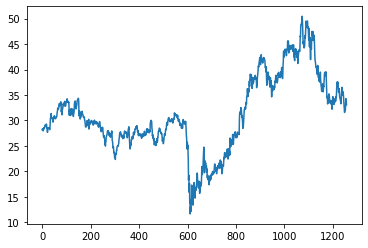

In [51]:
# Plotting the data for close for the stock.
plt.plot(df_close)

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scalar=MinMaxScaler()
df_close=scalar.fit_transform(np.array(df_close).reshape(-1,1))

In [58]:
df_close,df_close.shape

(array([[0.42779783],
        [0.42496132],
        [0.42264054],
        ...,
        [0.57839092],
        [0.56369263],
        [0.55260444]]),
 (1257, 1))

We have normalized the data between 0 and 1 .

We are using reshape(-1,1) becuase when are performing fit_transform on one column(feature) as fit_transform requires two columns.

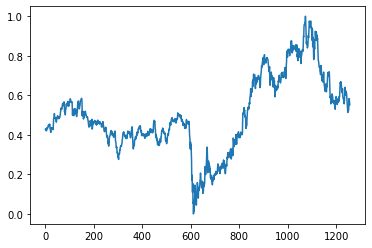

In [60]:
# Plotting the data for close for the stock.
plt.plot(df_close)

The Y-Axis of grpah is between 0 to 1

# Things to remember when dealing with time-series data.

1. During the train test split we can use cross-validation , and random seed.
These work well in Linear Regression or Classification.

In case of classification we need to divide the data in differnet method.
    a. IN our training data 70% of intital data shoudl be ordered on date's.
        Ex . day 1 -> Day2 and Day6 -> dDay 7
        
    As next data is always dependent on privous day

In [63]:
# Splitting the dataset on percentage as all the data is in series.

training_size=int(len(df_close)*0.65)
test_size=len(df)-training_size

train_data,test_data=df_close[0:training_size,:],df_close[training_size:len(df_close),:1]

In [81]:
def create_data(dataset,timestamp=1):
    # timestamp = 1, here we consided only 1 day data as traiing data for current day.
    dataX,dataY=[],[]
    for i in range(len(dataset)-timestamp-1):
        a=dataset[i:(i+timestamp),0]
        dataX.append(a)
        dataY.append(dataset[i+timestamp,0])
    return np.array(dataX),np.array(dataY)

In [84]:
time_step=100

X_train,y_train=create_data(train_data,time_step)
X_test,y_test=create_data(test_data,timestamp=time_step)

In [88]:
X_test.shape,y_test.shape

((339, 100), (339,))

In [92]:
#Building a model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense


In [99]:
model=Sequential(name="Abhijit")
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [101]:
print(model.summary())

Model: "Abhijit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
None


In [102]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 425ms/step - loss: 0.0486 - accuracy: 0.0014 - val_loss: 0.0519 - val_accuracy: 0.0029
Epoch 2/100
12/12 [==============================] - 3s 266ms/step - loss: 0.0083 - accuracy: 0.0014 - val_loss: 0.0083 - val_accuracy: 0.0029
Epoch 3/100
12/12 [==============================] - 3s 220ms/step - loss: 0.0053 - accuracy: 0.0014 - val_loss: 0.0377 - val_accuracy: 0.0029
Epoch 4/100
12/12 [==============================] - 3s 225ms/step - loss: 0.0037 - accuracy: 0.0014 - val_loss: 0.0144 - val_accuracy: 0.0029
Epoch 5/100
12/12 [==============================] - 3s 238ms/step - loss: 0.0032 - accuracy: 0.0014 - val_loss: 0.0109 - val_accuracy: 0.0029
Epoch 6/100
12/12 [==============================] - 3s 245ms/step - loss: 0.0029 - accuracy: 0.0014 - val_loss: 0.0127 - val_accuracy: 0.0029
Epoch 7/100
12/12 [==============================] - 3s 225ms/step - loss: 0.0026 - accuracy: 0.0014 - val_loss: 0.0058 - val_accuracy: 0.002

12/12 [==============================] - 3s 258ms/step - loss: 7.8452e-04 - accuracy: 0.0014 - val_loss: 0.0058 - val_accuracy: 0.0029
Epoch 58/100
12/12 [==============================] - 3s 258ms/step - loss: 7.7454e-04 - accuracy: 0.0014 - val_loss: 0.0088 - val_accuracy: 0.0029
Epoch 59/100
12/12 [==============================] - 3s 256ms/step - loss: 7.5381e-04 - accuracy: 0.0014 - val_loss: 0.0062 - val_accuracy: 0.0029
Epoch 60/100
12/12 [==============================] - 3s 283ms/step - loss: 7.8397e-04 - accuracy: 0.0014 - val_loss: 0.0060 - val_accuracy: 0.0029
Epoch 61/100
12/12 [==============================] - 4s 308ms/step - loss: 7.4468e-04 - accuracy: 0.0014 - val_loss: 0.0072 - val_accuracy: 0.0029
Epoch 62/100
12/12 [==============================] - 3s 278ms/step - loss: 7.8352e-04 - accuracy: 0.0014 - val_loss: 0.0054 - val_accuracy: 0.0029
Epoch 63/100
12/12 [==============================] - 3s 285ms/step - loss: 7.7018e-04 - accuracy: 0.0014 - val_loss: 0.0029 